# 📊 **1 - Estatística e Probabilidade Aplicadas a Finanças**

## **1.1 - Estatística descritiva para finanças**

## **1.2 - Distribuições estatísticas comuns no mercado financeiro**

## **1.3 - Momentos estatísticos (média, variância, skewness, curtose)**

## **1.4 - Testes de hipóteses e intervalos de confiança**

## **1.5 - Métodos de estimação** 

### **A importância dos métodos de estimação**

A estimativa de parâmetros é uma das bases fundamentais da estatística e da modelagem financeira. Em finanças quantitativas, compreender métodos de estimação é essencial para a análise de riscos, precificação de ativos, modelagem de séries temporais e construção de estratégias de investimento. Sem um entendimento sólido desses métodos, qualquer previsão ou inferência sobre o comportamento dos mercados pode ser imprecisa ou enviesada.

**Por que estimar parâmetros é essencial?**
Os modelos quantitativos utilizados no mercado financeiro, desde regressões simples até modelos complexos de volatilidade, dependem de parâmetros desconhecidos que devem ser estimados a partir dos dados. A precisão e robustez dessas estimativas influenciam diretamente a qualidade das decisões tomadas. Alguns exemplos incluem:

-  Precificação de Ativos: No modelo de Black-Scholes para precificação de opções, a volatilidade do ativo subjacente precisa ser estimada corretamente para evitar distorções no preço teórico da opção.

-  Modelagem de Séries Temporais: Modelos como ARIMA e GARCH exigem a estimação de coeficientes para prever retornos e volatilidades futuras.

-  Gestão de Risco: A alocação eficiente de um portfólio usa a matriz de covariância entre ativos, que precisa ser estimada a partir de retornos históricos.

-  Análise de Tendências e Fundamentos: Em modelos de machine learning para trading algorítmico, os parâmetros das distribuições probabilísticas dos retornos impactam diretamente as decisões estratégicas.

### **Método dos Momentos (MM)**

### **Máxima Verossimilhança (MLE)**

### **Mínimos Quadrados Ordinários (OLS)**

Esse método encontra a reta ou a superfície que melhor se ajusta aos dados minimizando a soma dos erros ao quadrado. A ideia central é escolher os parâmetros do modelo para que as diferenças entre os valores observados e os valores previstos pelo modelo sejam, em média, as menores possíveis.

Imagine que você quer prever a altura de uma criança a partir da idade. Você coleta dados de várias crianças e plota a altura (eixo $Y$) contra a idade (eixo $X$). Os pontos não formam uma linha perfeita, mas você quer encontrar a melhor reta que os representa.

O que o OLS faz? Ele escolhe a reta que minimiza a soma dos quadrados das distâncias verticais entre os pontos observados e a reta prevista. Isso significa que ele busca a melhor aproximação global, tentando equilibrar os erros para que, no geral, eles sejam os menores possíveis.

# 📈 **2 - Análise Quantitativa de Dados Financeiros**

## **2.1 - Coleta e manipulação de dados financeiros**

Vamos estudar como coletar os dados de ativos financeiros com o Python e suas bibliotecas

## Passo a passo
- **Coletar dados financeiros**: Utilizar yfinance para baixar informações históricas de um ativo.
- **Manipular os dados**: Realizar transformações e limpeza com a biblioteca Pandas.
- **Visualizar dados**: Criar gráficos que evidenciem a evolução dos preços ao longo do tempo.

## Pré-Requisitos
- **Python** instalado.
- Bibliotecas necessárias: `yfinance`/`alpha_vantage`, `pandas`, `matplotlib` (instaláveis via pip).

## Exemplo Prático em Python

Queremos então coletar informações sobre o ticker da Apple, APPL, e criar um dataframe em pandas com os preços de fechamentos dos últimos 12 meses.
```python
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Definindo o ticker do ativo (exemplo: AAPL para Apple)
ticker = yf.Ticker("AAPL")

# Coletando dados históricos do ativo para os últimos 12 meses
dados = ticker.history(period="1y")

# Exibindo as primeiras linhas dos dados coletados
print(dados.head())

# Garantindo que o índice seja do tipo datetime (geralmente já vem assim)
dados.index = pd.to_datetime(dados.index)

# Plotando o gráfico de preço de fechamento do ativo
plt.figure(figsize=(10, 5))
plt.plot(dados['Close'], label='Preço de Fechamento')
plt.title("Evolução do Preço de Fechamento da AAPL - Último Ano")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.legend()
plt.grid(True)
plt.show()

O Yfinance costuma ser muito instável, portanto recomenda-se o uso do [alpha_vantage](https://www.alphavantage.co/) para coleta de dados financeiros.

Abaixo segue o mesmo código de cima só que utilizando o alpha_vantage.

Detalhe, é necessário buscar uma chave API pessoal no site da [alpha_vantage](https://www.alphavantage.co/).

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt

# Insira sua chave de API do Alpha Vantage
api_key = 'YOUR_API_KEY'

# Cria uma instância da classe TimeSeries com saída em formato pandas
ts = TimeSeries(key=api_key, output_format='pandas')

# Coletando dados diários para a ação AAPL com output 'full' (todos os dados disponíveis)
data, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')

# Converter o índice para datetime (geralmente já vem como string)
data.index = pd.to_datetime(data.index)

# Filtrar os dados para obter aproximadamente os últimos 12 meses
end_date = data.index.max()
start_date = end_date - pd.DateOffset(years=1)
dados = data.loc[start_date:end_date]

# Exibindo as primeiras linhas dos dados coletados
print(dados.head())

# Plotando o gráfico do preço de fechamento (a coluna '4. close' contém o fechamento)
plt.figure(figsize=(10, 5))
plt.plot(dados.index, dados['4. close'], label='Preço de Fechamento')
plt.title("Evolução do Preço de Fechamento da AAPL - Último Ano")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.legend()
plt.grid(True)
plt.show()


## **2.2 - Construção de indicadores técnicos**

### *Indicadores*

Indicadores são fórmulas matemáticas aplicadas aos dados de mercado para gerar sinais que auxiliam na interpretação do comportamento de um ativo.

Podem ser representados por gráficos, linhas, osciladores, etc., facilitando a visualização e análise das tendências e padrões.

Ou seja, indicadores são representações gráficas de uma fórmula matemática que auxiliam na tomada de decisões.

Existem vários tipos de indicadores, que no geral são agrupados como:

- Tendência
- Momentum
- Volatilidade
- Volume

Também podemos criar indicadores baseados em dados alternativos, que ao invés de utilizarem cotações, baseiam-se em outras informações, como postagens em redes sociais (sentimento do mercado), relatórios financeiros (dados fundamentalistas), imagens de satélite (produção em áreas agrícolas), etc. Mas isso não será tratado neste tópico.

### **Indicadores de tendência**

Buscam identificar e acompanhar a direção predominante do movimento dos preços de um ativo financeiro ao longo do tempo.

Ajudam os investidores a entender se o mercado está em uma tendência de alta (bullish), baixa (bearish) ou lateral (sem tendência definida).

No geral, funcionam suavizando flutuações de curto prazo nos preços, destacando a direção subjacente do mercado.

Alguns indicadores são capazes de identificar o início e o final de uma tendência.

Outros são capazes de identificar a força da tendência.

Podem ser utilizados para definir pontos de entrada e saída em operações, melhorando a gestão do risco.

Múltiplas tendências podem existir em diferentes janelas de tempo (timeframes), como hora, dia, semana e mês da cotação.

Exemplos de indicadores de tendência:

- Médias móveis
- Parabolic SAR
- ADX (Average Directional Index)
- DPO (Detrended Price Oscillator)

#### **Médias móveis (SMA, EMA, VWAP)**

As médias móveis são ferramentas estatísticas fundamentais na análise técnica, utilizadas para suavizar a volatilidade dos preços e evidenciar tendências. Neste módulo, abordaremos três tipos principais:

- **SMA (Simple Moving Average)**: Média móvel simples, que calcula a média aritmética dos preços ao longo de um período definido.
- **EMA (Exponential Moving Average)**: Média móvel exponencial, que atribui maior peso aos preços mais recentes, tornando o indicador mais sensível às mudanças.
- **VWAP (Volume Weighted Average Price)**: Média ponderada pelo volume, que integra tanto os preços quanto os volumes negociados, refletindo o preço médio efetivo durante um período.

##### Explicação Didática

- **SMA:**  
  A SMA é calculada somando os preços de fechamento de um determinado número de períodos e dividindo esse total pelo número de períodos. Por exemplo, uma SMA de 10 dias é obtida pela soma dos preços de fechamento dos últimos 10 dias dividida por 10. Essa média é útil para identificar a tendência geral do preço, porém, por tratar todos os períodos de igual importância, pode responder lentamente a mudanças bruscas.

- **EMA:**  
  A EMA utiliza um fator de ponderação que confere maior relevância aos preços mais recentes. A fórmula recursiva para a EMA incorpora um multiplicador, que depende do número de períodos, para ajustar o peso dos dados passados. Isso torna a EMA mais ágil na identificação de mudanças de tendência em comparação à SMA.

- **VWAP:**  
  O VWAP é calculado dividindo o valor total negociado (soma de preço x volume) pelo volume total acumulado durante o período. Esse indicador é amplamente utilizado em negociações intradiárias, pois oferece uma visão mais precisa do preço médio ponderado pelo volume, auxiliando traders na identificação de pontos de suporte e resistência.

##### Recursos Adicionais

- **Pandas:** Explore as funções de janela móvel (rolling) para calcular médias de forma eficiente.  
- **TA-Lib:** Considere utilizar essa biblioteca para implementar indicadores técnicos prontos e realizar comparações.
- **Estudos de Caso:** Pesquise aplicações práticas de médias móveis em estratégias de trading e análise de risco.

Mais informações sobre médias móveis: 
- https://www.infomoney.com.br/guias/medias-moveis-analise-grafica/
- [Artigo da UFRGS sobre implementação de medias moveis](https://lume.ufrgs.br/bitstream/handle/10183/78323/000892034.pdf?sequence=1)

#### **Atividades**

De preferência utilize a mesma ação e calcule-a em uma celúla separada em prol do clean code

In [ ]:
### Seu codigo de coleta dos dados

1. **Cálculo da SMA**  
   - **Objetivo:** Desenvolver uma função que calcule a SMA para um conjunto de dados históricos de preços.  
   - **Atividade:**  
     - Implemente uma função em Python que receba uma série de preços e um número de períodos, e retorne a SMA correspondente.
     - Teste sua função com diferentes janelas (ex.: 5, 10 e 20 dias) e compare os resultados.

2. **Implementação da EMA**  
   - **Objetivo:** Entender e aplicar o cálculo da EMA.  
   - **Atividade:**  
     - Implemente uma função que calcule a EMA usando a fórmula recursiva.
     - Pondere sobre como a EMA reage a variações de preço mais recentes, altere a janela para checar as mudanças ocorridas.

3. **Cálculo do VWAP**  
   - **Objetivo:** Integrar volume e preço para calcular o VWAP de uma sessão de negociação.  
   - **Atividade:**  
     - Plote o VWAP juntamente com o preço de fechamento e analise como ele pode sinalizar possíveis pontos de entrada ou saída.

4. **Análise Comparativa**  
   - **Objetivo:** Comparar a eficácia dos três indicadores em diferentes cenários de mercado.  
   - **Atividade:**  
     - Crie um gráfico que exiba a SMA, EMA e VWAP para o mesmo período de tempo.
     - Discuta as diferenças entre os indicadores e em que situações cada um pode ser mais vantajoso para a tomada de decisão.

#### **Parabolic SAR**


<br>
<center>
  <img src="https://commodity.com/wp-content/uploads/technical-analysis/ParabolicSARgoldZG.gif" width="550px">

  <strong>Fonte:</strong>
  `https://commodity.com/technical-analysis/parabolic-sar/`
</center>
<br>

#### Cálculo do Parabolic SAR

O Parabolic SAR (Stop and Reverse) é um indicador técnico desenvolvido por Welles Wilder, utilizado para identificar pontos de reversão de tendência e determinar níveis de suporte e resistência. Em sua representação gráfica, os pontos aparecem abaixo dos preços durante uma tendência de alta e acima dos preços durante uma tendência de baixa.

##### Componentes Principais
- **SAR (Stop and Reverse):** Valor do indicador em cada período.
- **EP (Extreme Point):**  
  - Em uma tendência de alta: o maior preço registrado durante a tendência.  
  - Em uma tendência de baixa: o menor preço registrado durante a tendência.
- **AF (Acceleration Factor):**  
  - Um fator que inicia com um valor base (geralmente 0,02) e é incrementado (por exemplo, +0,02) sempre que o EP é atualizado, até atingir um valor máximo (comummente 0,20).  
  - Esse fator torna o indicador mais sensível à medida que a tendência se fortalece.

##### Fórmulas de Cálculo

- **Para uma tendência de alta:**  
  $$SAR_{i+1} = SAR_i + AF \times (EP - SAR_i)$$  
  Nesta fórmula, o novo valor do SAR é calculado ajustando o valor anterior com base na distância até o EP e no fator de aceleração, aproximando-se do EP conforme o preço sobe.

- **Para uma tendência de baixa:**  
  $$SAR_{i+1} = SAR_i - AF \times (SAR_i - EP)$$  
  Aqui, o SAR é ajustado para baixo, aproximando-se do EP (neste caso, o menor preço da tendência) conforme o preço cai.

##### Mecanismo de Funcionamento

1. **Início da Tendência:**  
   Define-se o SAR inicial com base no preço do período anterior e estabelece-se o EP (o maior preço para uma tendência de alta ou o menor preço para uma tendência de baixa).

2. **Atualização do EP:**  
   - Em uma tendência de alta, sempre que um novo máximo é atingido, o EP é atualizado para esse valor.
   - Em uma tendência de baixa, o EP é atualizado sempre que ocorre um novo mínimo.

3. **Ajuste do AF:**  
   Cada atualização do EP resulta em um incremento do AF (até o valor máximo estipulado), o que torna o indicador mais sensível às mudanças recentes de preço.

4. **Cálculo Recursivo:**  
   Para cada novo período, o SAR é recalculado utilizando a fórmula apropriada para a direção da tendência, permitindo um ajuste dinâmico do indicador.

5. **Sinal de Reversão:**  
   Se o preço ultrapassar o SAR calculado (ou seja, cair abaixo do SAR em uma tendência de alta ou subir acima do SAR em uma tendência de baixa), isso indica uma potencial reversão de tendência. Nesse momento, o SAR é recalculado e a direção da tendência é invertida.

Em resumo, o Parabolic SAR utiliza um mecanismo recursivo que combina ajustes dinâmicos (através do AF) e a atualização contínua do EP para oferecer sinais visuais que ajudam a identificar mudanças na direção do mercado.

- **Interpretação:**

  - Pontos abaixo do preço sugerem tendência de alta.

  - Pontos acima do preço sugerem tendência de baixa.

  - **Força da Tendência:** A distância entre os pontos e o preço pode indicar a força da tendência.

Na biblioteca ta do python já existem diversos indicadores implementados, inclusive o parabolic SAR e as médias móveis, então não necessitamos nos dar o trabalho de implementá-los todas as vezes que forem utilizados.
- [Documentação da TA-lib;](https://ta-lib.github.io/ta-lib-python/doc_index.html)
- [Para instalar utilize este link e faça o seu passo-a-passo;](https://github.com/TA-Lib/ta-lib-python)
- Recomenda-se que seja lida a documentação.

In [ ]:
# Exemplo de uso da biblioteca ta(lembre-se de importa-la e baixa-la no seu codigo)
indicator = ta.trend.PSARIndicator(
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    # Ajuste do fator de aceleração
    step=0.01,
)

#### **Indicador de tendência de força relativa (ADX)**

#### ADX (Indicador de Tendência Relativa)

O ADX (Average Directional Index) é um indicador técnico desenvolvido por Welles Wilder que mede a força de uma tendência, independentemente da sua direção (alta ou baixa). Diferente de outros indicadores que apontam a direção do movimento, o ADX foca exclusivamente na intensidade da tendência. Ele é frequentemente utilizado em conjunto com os indicadores de movimento direcional positivo (+DI) e negativo (-DI), que auxiliam na identificação da direção predominante do mercado.

##### Componentes e Conceitos

- **True Range (TR):** Mede a volatilidade diária e é calculado como o máximo entre:
  - A diferença entre a máxima e a mínima do dia.
  - A diferença absoluta entre a máxima do dia e o fechamento do dia anterior.
  - A diferença absoluta entre a mínima do dia e o fechamento do dia anterior.
  
  $$ TR = \max\{(High - Low),\; |High - Close_{prev}|,\; |Low - Close_{prev}|\} $$

- **Directional Movement (+DM e -DM):**  
  - **+DM (Movimento Direcional Positivo):** Diferença entre a máxima atual e a máxima do período anterior, se for maior que a variação negativa e maior que zero.
  - **-DM (Movimento Direcional Negativo):** Diferença entre a mínima do período anterior e a mínima atual, se for maior que a variação positiva e maior que zero.

- **Smoothed Values:**  
  Para reduzir ruídos, os valores de TR, +DM e -DM são suavizados, geralmente utilizando uma média móvel exponencial ou uma média móvel simples ao longo de 14 períodos.

##### Cálculo dos Indicadores

1. **Cálculo dos Índices Direcionais (+DI e -DI):**

   Após suavizar o TR, +DM e -DM, calcula-se:
   
   $$ +DI = 100 \times \frac{\text{Smoothed } +DM}{\text{Smoothed TR}} $$
   
   $$ -DI = 100 \times \frac{\text{Smoothed } -DM}{\text{Smoothed TR}} $$

2. **Cálculo do DX (Directional Index):**

   O DX é uma medida da diferença relativa entre os dois DI’s:
   
   $$ DX = 100 \times \frac{|+DI - -DI|}{+DI + -DI} $$

3. **Cálculo do ADX:**

   O ADX é a média móvel dos valores do DX, normalmente calculada em 14 períodos:
   
   $$ ADX = \text{Média Móvel de } DX $$
   
   Essa média suaviza as variações diárias do DX, fornecendo uma indicação mais estável da força da tendência.

##### Interpretação

- **ADX Alto (por exemplo, acima de 25):** Indica que o mercado está em uma tendência forte, seja de alta ou de baixa.
- **ADX Baixo (por exemplo, abaixo de 20):** Sugere que o mercado está em uma fase de consolidação ou sem uma tendência definida.


Abaixo vocês podem observar como a biblioteca TA-Lib nos será útil ao longo deste curso:

In [ ]:
### Cocidog sem TA-Lib

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Definir o ticker de uma ação brasileira (ex: PETR4 - Petrobras)
ticker = 'PETR4.SA'
# Baixar dados históricos do último ano
data = yf.download(ticker, period='1y')

# Cálculo do True Range (TR)
data['H-L'] = data['High'] - data['Low']
data['H-PC'] = abs(data['High'] - data['Close'].shift(1))
data['L-PC'] = abs(data['Low'] - data['Close'].shift(1))
data['TR'] = data[['H-L', 'H-PC', 'L-PC']].max(axis=1)

# Cálculo do Directional Movement
data['up_move'] = data['High'] - data['High'].shift(1)
data['down_move'] = data['Low'].shift(1) - data['Low']

# +DM: Movimento direcional positivo
data['+DM'] = np.where((data['up_move'] > data['down_move']) & (data['up_move'] > 0), data['up_move'], 0)
# -DM: Movimento direcional negativo
data['-DM'] = np.where((data['down_move'] > data['up_move']) & (data['down_move'] > 0), data['down_move'], 0)

# Período para o cálculo (geralmente 14 dias)
period = 14

# Suavização dos valores utilizando o método de Wilder (que pode ser aproximado pelo EWMA com alpha=1/period)
data['TR_smoothed'] = data['TR'].ewm(alpha=1/period, adjust=False).mean()
data['+DM_smoothed'] = data['+DM'].ewm(alpha=1/period, adjust=False).mean()
data['-DM_smoothed'] = data['-DM'].ewm(alpha=1/period, adjust=False).mean()

# Cálculo dos indicadores +DI e -DI
data['+DI'] = 100 * (data['+DM_smoothed'] / data['TR_smoothed'])
data['-DI'] = 100 * (data['-DM_smoothed'] / data['TR_smoothed'])

# Cálculo do DX (índice direcional)
data['DX'] = 100 * abs(data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI'])

# Cálculo do ADX: média suavizada do DX
data['ADX'] = data['DX'].ewm(alpha=1/period, adjust=False).mean()

# Remover valores nulos gerados pelo shift e cálculos iniciais
data = data.dropna()

# Plotando o gráfico do preço de fechamento e do ADX
plt.figure(figsize=(14,8))

# Gráfico 1: Preço de Fechamento
plt.subplot(2,1,1)
plt.plot(data.index, data['Close'], label='Preço de Fechamento', color='blue')
plt.title(f"{ticker} - Preço e Indicador ADX")
plt.ylabel("Preço (BRL)")
plt.legend()
plt.grid(True)

# Gráfico 2: ADX
plt.subplot(2,1,2)
plt.plot(data.index, data['ADX'], label='ADX', color='magenta')
plt.axhline(25, color='grey', linestyle='--', label='Nível 25')
plt.title("Average Directional Index (ADX)")
plt.xlabel("Data")
plt.ylabel("ADX")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Agora vamos diminuir bastante a sintaxe carregada do código utilizando a bilioteca TA:

In [ ]:
import talib

# Definir o ticker de uma ação brasileira (ex: PETR4 - Petrobras)
ticker = 'PETR4.SA'
# Baixar dados históricos do último ano
data = yf.download(ticker, period='1y')

# Remover possíveis valores nulos
data = data.dropna()

# Utilizando TA-lib para calcular o ADX com período de 14 dias
data['ADX'] = talib.ADX(data['High'], data['Low'], data['Close'], timeperiod=14)

# Plotando o gráfico do preço de fechamento e do ADX
plt.figure(figsize=(14,8))

# Gráfico 1: Preço de Fechamento
plt.subplot(2,1,1)
plt.plot(data.index, data['Close'], label='Preço de Fechamento', color='blue')
plt.title(f"{ticker} - Preço e Indicador ADX")
plt.ylabel("Preço (BRL)")
plt.legend()
plt.grid(True)

# Gráfico 2: ADX
plt.subplot(2,1,2)
plt.plot(data.index, data['ADX'], label='ADX', color='magenta')
plt.axhline(25, color='grey', linestyle='--', label='Nível 25')
plt.title("Average Directional Index (ADX)")
plt.xlabel("Data")
plt.ylabel("ADX")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### **Indicadores de momentum**

## Indicadores de momentum


 Indicadores de momentum buscam identificar a **velocidade ou força de uma tendência**.

 O termo "momentum" refere-se à quantidade de movimento ou força de um ativo durante um determinado período de tempo.

 Ele é baseado na ideia de que **movimentos de tendência de preços podem ganhar ou perder força**, o que pode ser um indicativo da continuação ou reversão deles.

 Um **alto momentum** indica uma rápida mudança de preço, enquanto um **baixo momentum** sugere que o preço está mudando lentamente.

**Inércia dos Preços:** assim como a inércia em física, o conceito de momentum sugere que uma vez que um ativo começa a se mover em uma direção, é provável que continue a se mover nessa direção, a menos que uma força externa (como notícias ou eventos macroeconômicos) cause uma mudança.

Evidentemente, o cálculo de indicadores de momentum não é extremamente preciso, entretanto, ao ser combinado com outros indicadores, seja para a análise técnica propriamente dita ou para alimentar modelos de ML(Machile Learning), pode ser bastante útil e relevante.

 Exemplos de indicadores de momentum:

  - RSI (Relative Strength Index)
  - Oscilador Estocástico

#### **Índice de Força Relativa (RSI)**


<br>
<center>
  <img src="https://commodity.com/wp-content/uploads/technical-analysis/RSIEBAYbuysell.gif" width="550px">

  <strong>Fonte:</strong>
  `https://commodity.com/technical-analysis/relative-strength-index/`
</center>
<br>


O RSI, ou Índice de Força Relativa, é um indicador de momentum criado por Welles Wilder que mede a velocidade e a mudança dos movimentos de preço. Ele varia de 0 a 100 e é amplamente utilizado para identificar condições de sobrecompra e sobrevenda de um ativo, sinalizando possíveis pontos de reversão.

##### Conceitos e Cálculo

- **Objetivo:**  
  O RSI busca quantificar a força de uma tendência comparando a magnitude dos ganhos e das perdas em um determinado período, normalmente 14 períodos.

- **Etapas do Cálculo:**

  1. **Determinação das variações diárias:**  
     Para cada período, calcula-se a variação do preço:
     - Se a variação for positiva, ela é considerada ganho.
     - Se a variação for negativa, ela é considerada perda (usando o valor absoluto).

  2. **Cálculo das médias de ganhos e perdas:**  
     - **Média dos Ganhos (MG):** Média das variações positivas ao longo do período escolhido.  
     - **Média das Perdas (MP):** Média das variações negativas (como valores absolutos) ao longo do mesmo período.

  3. **Cálculo da Razão de Força (RS):**  
     $$ RS = \frac{\text{Média dos Ganhos (MG)}}{\text{Média das Perdas (MP)}} $$

  4. **Cálculo do RSI:**  
     A partir do RS, o RSI é calculado pela fórmula:
     $$ RSI = 100 - \frac{100}{1 + RS} $$

##### Interpretação

- **Condições de Sobrecompra e Survenda:**  
  - **RSI > 70:** Geralmente indica que o ativo pode estar sobrecomprado, sugerindo a possibilidade de uma correção ou reversão de tendência.  
  - **RSI < 30:** Sugere que o ativo pode estar sobrevendido, o que pode ser um sinal de uma recuperação iminente.

- **Divergências:**  
  Quando o preço forma topos ou fundos que não são confirmados pelo RSI, isso pode indicar uma divergência. Tais divergências podem sinalizar que a tendência atual está perdendo força e uma reversão pode ocorrer.


No código abaixo, podemos observar o RSI e o valor de fechamento real da PETR4, análise o que ocorre e se as tendências indicadas pelo RSI são confirmadas nos preços e também como foi criado o código python para a plotagem e para o calculo do índice e dos preços.

Head dos dados filtrados:
            1. open  2. high  3. low  4. close    5. volume
date                                                       
2023-01-02    23.54    23.81   22.80     22.92   78424700.0
2023-01-03    22.94    23.10   22.13     22.34   96750300.0
2023-01-04    21.96    23.59   21.83     23.05  129504000.0
2023-01-05    23.34    24.04   23.15     23.88   73886000.0
2023-01-06    23.94    24.32   23.55     23.74   51851500.0
Formato dos dados: (499, 5)


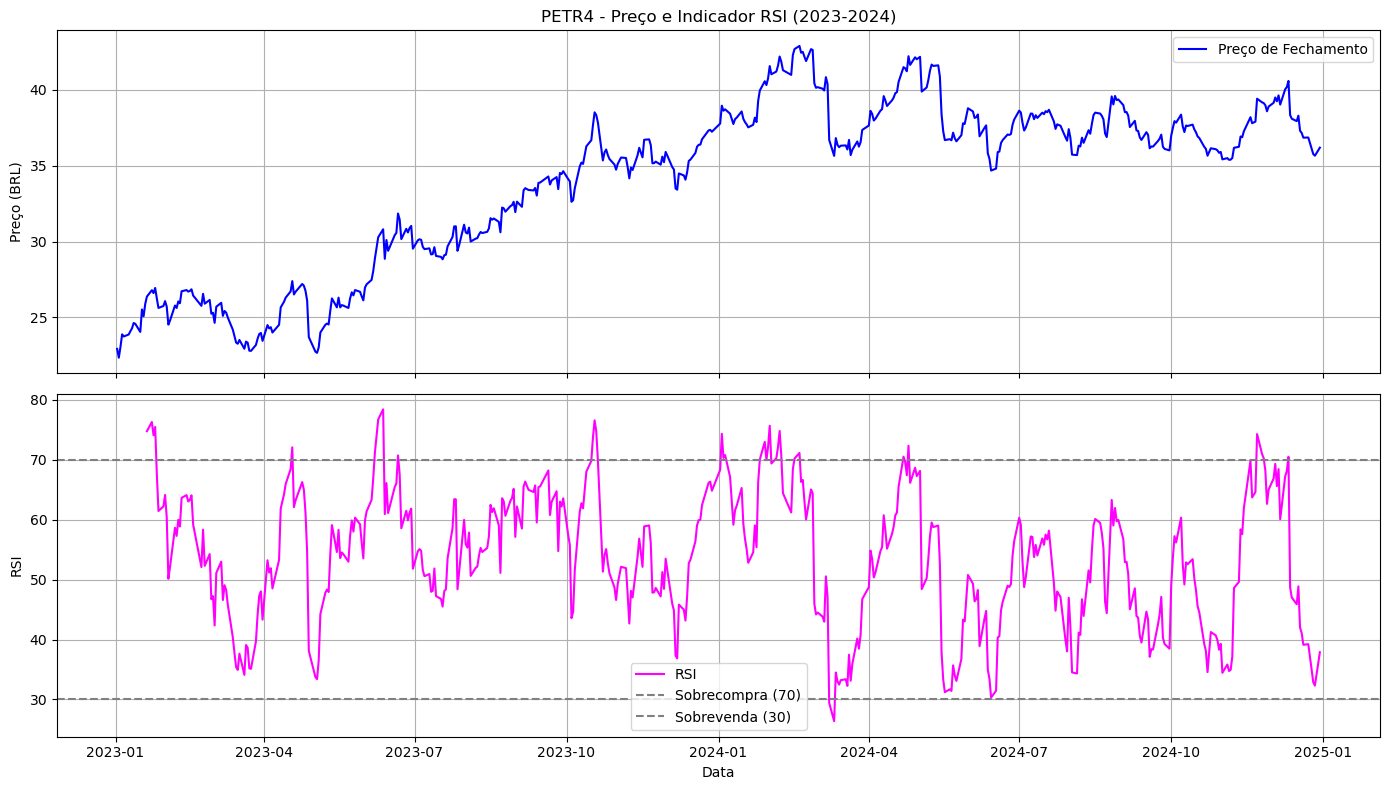

In [15]:
from alpha_vantage.timeseries import TimeSeries
import talib
import matplotlib.pyplot as plt
import pandas as pd

# Insira sua chave de API do Alpha Vantage
api_key = 'SUA_CHAVE_API'

# Cria uma instância da classe TimeSeries com output no formato pandas
ts = TimeSeries(key=api_key, output_format='pandas')

# Obter dados diários para a ação PETR4 (verifique se o ticker está correto)
data, meta_data = ts.get_daily(symbol='PETR4.SAO', outputsize='full')

# Converter o índice para datetime (se ainda não foi feito)
data.index = pd.to_datetime(data.index)

### 
# Aqui ordenamos o dataframe em ordem crescente de data, pois o padrão do Alpha Vantage é do mais recente para o mais antiga
###
data.sort_index(inplace=True)

# Filtrar dados para os anos de 2023 e 2024
start_date = pd.to_datetime('2023-01-01')
end_date   = pd.to_datetime('2024-12-31')
data = data.loc[start_date:end_date]

# Verificar se há dados disponíveis para o período solicitado
print("Head dos dados filtrados:")
print(data.head())
print("Formato dos dados:", data.shape)

if data.empty:
    print("O DataFrame está vazio. Verifique se o ticker e o período estão corretos.")
else:
    # Remover possíveis valores nulos
    data = data.dropna()

    # Utilizar TA-lib para calcular o RSI com período de 14 dias
    # Garantir que o array de preços seja 1D
    close_prices = data['4. close'].to_numpy().flatten()
    data['RSI'] = talib.RSI(close_prices, timeperiod=14)

    # Criar uma figura com subplots que compartilham o mesmo eixo X (escala temporal)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(14, 8))

    # Gráfico 1: Preço de Fechamento
    ax1.plot(data.index, data['4. close'], label='Preço de Fechamento', color='blue')
    ax1.set_title("PETR4 - Preço e Indicador RSI (2023-2024)")
    ax1.set_ylabel("Preço (BRL)")
    ax1.legend()
    ax1.grid(True)

    # Gráfico 2: RSI
    ax2.plot(data.index, data['RSI'], label='RSI', color='magenta')
    ax2.axhline(70, color='grey', linestyle='--', label='Sobrecompra (70)')
    ax2.axhline(30, color='grey', linestyle='--', label='Sobrevenda (30)')
    ax2.set_xlabel("Data")
    ax2.set_ylabel("RSI")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


Observando o código, vocês encontram algumas checagens e procedimentos em cima dos dados a serem trabalhos, checagem se o df está vazio, mudança na ordem das data pré-slicing dos dados, etc.
Isso tudo serve para prevenir erros e indetificá-los caso ocorram, levem isso para toda análise quantitativa que farão.

#### **Oscilador Estocástico (STOCH)**

O Oscilador Estocástico é um indicador de momentum desenvolvido por George C. Lane, que compara o preço de fechamento de um ativo com a sua faixa de preços durante um período específico. Ele auxilia na identificação de condições de sobrecompra e sobrevenda, sugerindo possíveis pontos de reversão na tendência.

##### Componentes e Cálculos

- **%K (Linha Rápida):**  
  Representa o valor atual do oscilador. É calculado por:
  
  $$
  \%K = \frac{\text{Preço de Fechamento} - \text{Mínimo Móvel}}{\text{Máximo Móvel} - \text{Mínimo Móvel}} \times 100
  $$
  
  Onde:
  - **Preço de Fechamento:** Valor de fechamento do período atual.
  - **Mínimo Móvel:** Menor preço registrado durante o período de análise.
  - **Máximo Móvel:** Maior preço registrado durante o mesmo período.

- **%D (Linha Lenta):**  
  É a média móvel de %K (geralmente uma média simples de 3 períodos) e serve para suavizar os sinais do %K:
  
  $$
  \%D = \text{Média Móvel de } \%K
  $$

##### Interpretação dos Sinais

- **Condições de Sobrecompra:**  
  Valores acima de 80 podem indicar que o ativo está sobrecomprado, sugerindo um possível enfraquecimento da tendência de alta e a iminência de uma reversão para baixa.

- **Condições de Sobrevenda:**  
  Valores abaixo de 20 podem indicar que o ativo está sobrevendido, sugerindo que a pressão vendedora pode estar se esgotando e uma reversão para alta pode ocorrer.

- **Cruzamentos entre %K e %D:**  
  - **Cruzamento de alta (sinal de compra):** Ocorre quando a linha %K cruza de baixo para cima da linha %D, indicando o início de um momentum de alta.
  - **Cruzamento de baixa (sinal de venda):** Ocorre quando a linha %K cruza de cima para baixo da linha %D, sugerindo o início de um momentum de baixa.

Mais fontes: 
[Trading View](https://br.tradingview.com/support/solutions/43000502332/), 
[XP Investimentos](https://conteudos.xpi.com.br/aprenda-a-investir/relatorios/estocastico/)

#### Utilização do Oscilador Estocástico na TA-Lib

A TA-Lib fornece funções que permitem calcular o Oscilador Estocástico de forma simples e direta. Esse indicador de momentum compara o preço de fechamento de um ativo com sua faixa de preços durante um período específico, ajudando a identificar condições de sobrecompra e sobrevenda.

##### Função `talib.STOCH`

A função principal para calcular o oscilador estocástico na TA-Lib é a `talib.STOCH`, que retorna duas séries:
- **%K (Linha Rápida):** Indica a posição do preço de fechamento atual em relação à faixa de preços (mínimo e máximo) do período.
- **%D (Linha Lenta):** É a média móvel da linha %K, utilizada para suavizar os sinais.

A sintaxe básica da função é:

```python
slowk, slowd = talib.STOCH(high, low, close,
                           fastk_period=14,    # Período para cálculo da %K
                           slowk_period=3,     # Período de suavização da %K
                           slowk_matype=0,     # Tipo de média móvel para a %K (0 = SMA, 1 = EMA, etc.)
                           slowd_period=3,     # Período para cálculo da %D (média móvel da %K)
                           slowd_matype=0)     # Tipo de média móvel para a %D


1. **Análise Comparativa:**
   - Compare o uso do STOCH com o RSI, as suas divergências e convergências.
   - **Atividade:**
     - Calcule o Oscilador Estocástico e o RSI para o mesmo ativo e período.
     - Plote ambos os indicadores e discuta as situações em que os sinais se complementam ou divergem.
     - Analise a eficácia dos sinais para confirmar reversões ou a continuidade da tendência.

### **Indicadores de volatilidade**
 Indicam o **quanto e o quão rápido** os preços de um ativo estão mudando.

 Medem a **magnitude das variações de preço** de um ativo financeiro ao longo do tempo.

Eles são usados para avaliar o **nível de incerteza ou risco** associado ao movimento dos preços de um ativo.

 A volatilidade representa a **variabilidade dos retornos** de um ativo.

 Quanto maior a volatilidade, maior a **variação dos preços**.

 **Alta volatilidade** indica um maior risco, mas também maior potencial de retorno.

 Períodos de alta volatilidade podem ser causados por eventos de mercado, notícias econômicas, ou mudanças significativas na oferta e demanda.

 **Baixa volatilidade** indica um menor risco, mas também menor potencial de retorno.

 Pode sugerir um mercado estável ou uma falta de interesse no ativo.

 Exemplos de indicadores de volatilidade:

  - Desvio Padrão dos Retornos
  - [Bollinger Bands](https://www.infomoney.com.br/guias/bandas-bollinger/)
  - [Average True Range (ATR)](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/atr#:~:text=Description,daily%2C%20weekly%2C%20or%20monthly.)

#### **Desvio Padrão dos Retornos**

#### Desvio Padrão dos Retornos

O Desvio Padrão dos Retornos é um indicador de volatilidade que quantifica a dispersão dos retornos de um ativo em torno de sua média. Em outras palavras, ele mede o quão "variados" ou "espalhados" são os retornos diários (ou de outro período) de um ativo, permitindo que analistas e traders entendam melhor o risco associado a ele.

##### Conceitos e Cálculo

1. **Retorno:**  
   O retorno de um ativo para um determinado período é calculado geralmente como a variação percentual do preço de fechamento:
   $$
   Retorno_t = \frac{Preço_{t} - Preço_{t-1}}{Preço_{t-1}}
   $$
   ou, equivalentemente,
   $$
   Retorno_t = \frac{Preço_{t}}{Preço_{t-1}} - 1
   $$

2. **Média dos Retornos:**  
   Após calcular os retornos para cada período, a média dos retornos (\(\mu\)) é determinada:
   $$
   \mu = \frac{1}{N} \sum_{t=1}^{N} Retorno_t
   $$
   onde \(N\) é o número de períodos analisados.

3. **Desvio Padrão dos Retornos:**  
   O desvio padrão (\(\sigma\)) mede a dispersão dos retornos em relação à média:
   $$
   \sigma = \sqrt{\frac{1}{N} \sum_{t=1}^{N} \left(Retorno_t - \mu\right)^2}
   $$
   Um desvio padrão maior indica maior volatilidade, ou seja, os retornos se dispersam amplamente em torno da média, enquanto um valor menor indica retornos mais concentrados.

##### Interpretação

- **Volatilidade:**  
  Um alto desvio padrão dos retornos sugere que o ativo é mais volátil, podendo apresentar movimentos de preço mais bruscos, o que, por sua vez, pode estar associado a um maior risco.  
  Um desvio padrão baixo indica que os retornos estão mais próximos da média, sinalizando menor volatilidade e, geralmente, menor risco.

- **Gestão de Risco:**  
  Investidores e gestores de carteira usam esse indicador para ajustar o tamanho das posições e definir limites de stop loss, além de comparar o risco entre diferentes ativos.

##### Exercícios
Agora crie em python um código para calcular o Desvio Padrão dos Retornos e plotá-los em um gráfico junto ao preço de fechmaento do ativo, para que, assim, possamos tirar conclusões sobre o significado desse indicador de volatilidade.

In [ ]:
### Seu código AQUI

Pesquise o que está sendo pressuposto para tomarmos isso como uma medida de volatilidade. 
Dica: Pesquise sobre normalidade e independência estatística.

#### **Bandas de Bollinger**
As Bandas de Bollinger são um indicador de volatilidade desenvolvido por John Bollinger, que ajuda a identificar períodos de alta ou baixa volatilidade e potenciais pontos de reversão. Elas consistem em três linhas que envolvem o preço do ativo:

- **Linha Central:** Geralmente é uma média móvel simples (SMA) de um determinado período.
- **Banda Superior:** É calculada somando-se um múltiplo (normalmente 2) do desvio padrão à média móvel.
- **Banda Inferior:** É calculada subtraindo-se o mesmo múltiplo do desvio padrão da média móvel.

##### Fórmulas

1. **Média Móvel Simples (SMA):**

   $$
   \text{SMA}_n = \frac{1}{n} \sum_{i=0}^{n-1} P_{t-i}
   $$

   Onde \( P_t \) representa o preço no período \( t \) e \( n \) é o número de períodos.

2. **Desvio Padrão (σ):**

   $$
   \sigma_n = \sqrt{\frac{1}{n} \sum_{i=0}^{n-1} (P_{t-i} - \text{SMA}_n)^2}
   $$

3. **Banda Superior e Inferior:**

   $$
   \text{Banda Superior} = \text{SMA}_n + (k \times \sigma_n)
   $$

   $$
   \text{Banda Inferior} = \text{SMA}_n - (k \times \sigma_n)
   $$

   Geralmente, o valor de \( k \) é 2.

##### Interpretação

- **Contração das Bandas:** Quando as bandas se estreitam, significa que a volatilidade está baixa. Essa situação pode preceder uma grande movimentação do preço.
- **Expansão das Bandas:** Quando as bandas se alargam, indica alta volatilidade.
- **Toques nas Bandas:** 
  - Se o preço toca ou ultrapassa a banda superior, o ativo pode estar sobrecomprado.
  - Se o preço toca ou cai abaixo da banda inferior, o ativo pode estar sobrevendido.

##### Aplicações Práticas

- **Sinais de Reversão:** Alguns traders observam toques ou rompimentos das bandas para identificar potenciais pontos de reversão. No entanto, o toque isolado pode não ser suficiente para tomar decisões; é aconselhável utilizar outros indicadores ou confirmações.
- **Gestão de Risco:** As bandas podem ajudar a definir níveis de stop loss ou pontos de entrada/saída, já que indicam zonas de alta e baixa volatilidade.

Abaixo calcularemos as bandas de bollinger utilizando a biblioteca TA-lib, o código está incompleto, então corrigia-o completando os dados financeiros.

In [ ]:
import talib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Complete o código e para que o plot saia corretamente, utilize a lib de sua preferência, yfinance ou alpha_vantage

# Plotando os resultados
plt.figure(figsize=(10,5))
plt.plot(close, label='Preço de Fechamento', color='blue')
plt.plot(middleband, label='SMA (20 dias)', color='black')
plt.plot(upperband, label='Banda Superior', color='green')
plt.plot(lowerband, label='Banda Inferior', color='red')
plt.title("Bandas de Bollinger")
plt.xlabel("Período")
plt.ylabel("Preço")
plt.legend()
plt.grid(True)
plt.show()

Após completar o código, observe em que momentos as Bandas de Bollinger falham em detectar os padrões. E abaixo veremos uma possível explicação para os erros e um aprofundamento das Bandas de Bollinger

#### Bandas de Bollinger: O Valor do Multiplicador "k"

As Bandas de Bollinger são compostas por uma média móvel central (geralmente uma SMA) e duas bandas — uma superior e uma inferior — que são definidas adicionando e subtraindo um múltiplo do desvio padrão da média. Esse múltiplo é representado por "k" e, na prática, o valor mais comumente adotado é 2.

##### Por Que Utilizar k = 2?

- **Fundamento Estatístico:**  
  Se assumirmos que os preços seguem uma distribuição normal, cerca de 95% dos valores estarão dentro de 2 desvios padrão da média (regra empírica 68-95-99,7). Assim, definir k = 2 faz com que as bandas englobem aproximadamente 95% dos movimentos de preço em condições normais de mercado.

- **Praticidade na Interpretação:**  
  O valor de 2 é amplamente utilizado porque torna a visualização dos sinais mais intuitiva:  
  - Quando o preço ultrapassa a banda superior, pode ser um indicativo de sobrecompra.  
  - Quando o preço cai abaixo da banda inferior, pode sugerir sobrevenda.  
  Esses extremos são usados como alertas para possíveis reversões de tendência ou ajustes de correção.

- **Eficácia Empírica:**  
  Embora os preços nem sempre sigam uma distribuição perfeitamente normal — muitas vezes apresentando caudas mais pesadas —, a configuração com k = 2 tem se mostrado eficaz em diversos mercados e períodos históricos, servindo como um bom ponto de partida para a análise técnica.

##### Referências

- [Bollinger, J. (2001).** *Bollinger on Bollinger Bands.* McGraw-Hill.](https://annas-archive.org/md5/2f9f9305c4921551b289e57fa7adc3ed)

##### Considerações Finais

A escolha de k = 2 não é arbitrária, mas sim fundamentada na teoria da estatística aplicada ao comportamento dos preços. Essa configuração permite que as Bandas de Bollinger ofereçam uma visão equilibrada da volatilidade, ajudando a identificar pontos de reversão e a avaliar condições de mercado extremos, como sobrecompra e sobrevenda. Apesar das limitações da hipótese de normalidade nos mercados financeiros, o uso de k = 2 continua sendo um padrão amplamente adotado na prática da análise técnica.


##### Exercício
Agora que você tem uma ideia melhor do por que alguns indicadores falham, verifique a normalidade dos retornos em que foram trabalhados os últimos indicadores e cheque se isso serve como uma explicação para as falhas.

In [ ]:
# Seu código AQUI

#### **ATR (Average True Range)**

O ATR é um indicador de volatilidade desenvolvido por J. Welles Wilder Jr. que mede a amplitude dos movimentos de preço ao longo de um período, considerando inclusive os gaps (diferenças entre o fechamento de um período e a abertura do próximo). Ele é amplamente utilizado para avaliar a volatilidade do mercado e para definir níveis de stop-loss e dimensionamento de posições.

##### Cálculo do ATR

1. **True Range (TR):**  
   Para cada período, calcula-se o True Range, que é definido como o maior valor entre:
   - A diferença entre a máxima e a mínima do período atual.
   - A diferença absoluta entre a máxima do período atual e o fechamento do período anterior.
   - A diferença absoluta entre a mínima do período atual e o fechamento do período anterior.
   
   Matemáticamente:
   
   $$
   TR_t = \max\{High_t - Low_t,\; |High_t - Close_{t-1}|,\; |Low_t - Close_{t-1}|\}
   $$

2. **Average True Range (ATR):**  
   O ATR é a média móvel (geralmente uma média simples ou exponencial) dos valores de TR ao longo de um determinado número de períodos, comumente 14 períodos:
   
   $$
   ATR = \frac{1}{n} \sum_{i=1}^{n} TR_i
   $$

##### Interpretação e Aplicações

- **Volatilidade:**  
  Um ATR maior indica que os preços têm se movimentado de forma mais ampla e, portanto, o mercado está mais volátil. Um ATR menor indica menor volatilidade.
  
- **Uso Prático em Trading:**  
  - **Definição de Stop-Loss:** Traders frequentemente utilizam o ATR para definir níveis de stop-loss que se ajustem à volatilidade atual. Por exemplo, um stop-loss pode ser posicionado a 1.5 ou 2 vezes o valor do ATR a partir do preço de entrada.
  - **Dimensionamento de Posições:** Em mercados mais voláteis, os traders podem optar por reduzir o tamanho da posição para controlar o risco.

##### Suposições e Comparações com o Desvio Padrão dos Retornos


No caso do ATR, diferentemente do Desvio Padrão dos Retornos e das Bandas de Bollinger:

- **Não se Assume uma Distribuição Específica:**  
  O ATR não pressupõe que os preços ou retornos sigam uma distribuição normal. Ele mede a amplitude real dos movimentos de preço, incluindo gaps, o que pode fornecer uma visão mais completa da volatilidade, especialmente em mercados com "caudas pesadas" ou eventos extremos.


##### Exercício
Ao fim deste tópico, compare os 3 indicadores de volatilidade apresentados em um único bloco de gráficos e pondere sobre suas divergências em possíveis conclusões, isto é, quando um indica baixa vol o outro também o faz? Quando isso ocorre e por que isso ocorre?

In [ ]:
# Seu código AQUI

### **Indicadores de volume**

Os indicadores de volume são ferramentas essenciais na análise técnica, pois medem a intensidade das negociações de um ativo, oferecendo insights sobre a participação dos investidores e a liquidez do mercado. Eles ajudam a confirmar ou refutar sinais gerados pelos movimentos de preços, complementando a análise de tendências e osciladores.

##### Conceitos Fundamentais

- **Volume:**  
  Representa a quantidade total de ações, contratos ou unidades negociadas em um determinado período. Um volume elevado indica alta participação dos investidores, enquanto um volume baixo pode sugerir baixa liquidez e menor convicção nos movimentos de preço.

- **Confirmação de Tendência:**  
  Movimentos de preço acompanhados por um volume elevado geralmente são considerados mais robustos e confiáveis. Por exemplo, uma alta de preço com aumento de volume indica que os compradores estão ativos e sustentando a tendência, enquanto uma alta com volume decrescente pode sugerir fraqueza.

- **Divergência:**  
  Quando o movimento de preço não é acompanhado por um aumento correspondente no volume, pode haver uma divergência. Essa discrepância é frequentemente interpretada como um sinal de que o movimento de preço pode ser temporário ou estar prestes a reverter.

##### Exemplos de Indicadores de Volume

- **On Balance Volume (OBV):**  
  Acumula o volume dos períodos com base no movimento dos preços, somando o volume dos dias em que o preço fecha em alta e subtraindo o volume dos dias em que o preço fecha em baixa. Um OBV crescente sugere que o volume está confirmando uma tendência de alta.

- **Volume Oscillator:**  
  Calcula a variação percentual entre duas médias móveis do volume. Essa oscilação ajuda a identificar momentos de aceleração ou desaceleração na atividade de negociação.

- **Volume Weighted Average Price (VWAP):**  
  Embora muitas vezes utilizado em operações intradiárias, o VWAP pondera o preço pelo volume negociado, oferecendo um preço médio que reflete a importância de cada transação no período.

##### Aplicações Práticas

- **Validação de Sinais:**  
  Um movimento de preço acompanhado de alto volume reforça a validade do sinal. Por exemplo, um rompimento de resistência com volume elevado tem maior probabilidade de ser sustentável.

- **Identificação de Reversões:**  
  Divergências entre o preço e os indicadores de volume podem sinalizar uma reversão iminente. Se o preço está subindo sem um aumento correspondente no volume, isso pode indicar que o interesse dos compradores está diminuindo.

- **Gestão de Risco:**  
  Indicadores de volume são usados para definir níveis de stop-loss e para ajustar o tamanho das posições, considerando a liquidez do ativo.


<center>
  <img src="https://pbs.twimg.com/media/FTO_i0pUUAAH6h3.jpg" width="450px">

</center>
<br>

#### On Balance Volume (OBV)

**Descrição:**  
O On Balance Volume (OBV) é um indicador de volume que visa capturar a pressão acumulada de compra e venda ao longo do tempo. Ele agrega o volume negociado de forma cumulativa, atribuindo sinais positivos quando o preço sobe e sinais negativos quando o preço cai. A ideia central é que o volume pode preceder os movimentos dos preços, servindo como um complemento à análise de tendências.

**Cálculo:**  
Para cada período, o OBV é calculado da seguinte forma:

$$
\text{Se } Close_t > Close_{t-1}:\quad OBV_t = OBV_{t-1} + Volume_t
$$

$$
\text{Se } Close_t < Close_{t-1}:\quad OBV_t = OBV_{t-1} - Volume_t
$$

$$
\text{Se } Close_t = Close_{t-1}:\quad OBV_t = OBV_{t-1}
$$

**Interpretação:**  
Um OBV crescente sugere que os volumes dos dias de alta estão superando os volumes dos dias de baixa, indicando acumulação e potencial continuação de uma tendência de alta. Por outro lado, um OBV decrescente indica que os volumes dos dias de baixa dominam, sinalizando possível distribuição e pressão vendedora. Divergências entre o OBV e os preços podem alertar para a perda de força na tendência, sugerindo uma possível reversão.

**Considerações Adicionais:**  
O OBV é valorizado por sua simplicidade e por fornecer uma perspectiva sobre o fluxo de volume, o que pode confirmar ou antecipar mudanças nos preços. Entretanto, como qualquer indicador, ele deve ser interpretado em conjunto com outros sinais técnicos e com a análise do contexto de mercado para minimizar a ocorrência de sinais falsos, especialmente em períodos de baixa liquidez. Estudos clássicos em análise técnica, como os de Murphy e Bollinger, destacam o OBV como uma ferramenta importante na identificação de tendências e na avaliação da força dos movimentos de preços.


#### Exercício 1: Cálculo e Interpretação do OBV

Considere um conjunto de dados históricos de um ativo que contenha as colunas "Close" e "Volume".
Depois de implementar o cálculo, plote o OBV juntamente com os preços de fechamento do ativo e analise possíveis divergências entre o OBV e os movimentos dos preços que possam indicar uma reversão de tendência.

#### Volume Oscillator

**Descrição:**  
O Volume Oscillator é um indicador que mede a variação percentual entre duas médias móveis do volume, geralmente uma de curto prazo e outra de longo prazo. Ele revela se o volume recente está acima ou abaixo da média de volume de um período mais extenso, ajudando a identificar mudanças na atividade dos investidores e na dinâmica do mercado.

**Cálculo:**  
Primeiro, são calculadas duas médias móveis simples (ou exponenciais) do volume:

- Média móvel de curto prazo (por exemplo, 5 dias).
- Média móvel de longo prazo (por exemplo, 20 dias).

A fórmula do Volume Oscillator é:


$$
\text{Volume Oscillator} = \frac{\text{MM}_{\text{curto}} - \text{MM}_{\text{longo}}}{\text{MM}_{\text{longo}}} \times 100
$$

**Interpretação:**  
Valores positivos indicam que o volume recente está acima da média de longo prazo, sugerindo um aumento na atividade e possivelmente reforçando uma tendência. Valores negativos, por sua vez, indicam que o volume recente está abaixo da média, o que pode sinalizar uma desaceleração na atividade de negociação.

**Considerações Adicionais:**  
O Volume Oscillator é útil para detectar mudanças no comportamento dos investidores, funcionando como um filtro para confirmar a força ou fraqueza de uma tendência. Contudo, ele pode ser sensível a oscilações de curto prazo, o que exige cautela na interpretação. A análise combinada com outros indicadores técnicos pode aprimorar a identificação de pontos de reversão ou continuidade, conforme discutido em obras clássicas de análise técnica.


#### Exercício 2
Faça o mesmo do Exercício 1 para o Volume Oscillator

#### Volume Weighted Average Price (VWAP)

**Descrição:**  
O VWAP, ou Preço Médio Ponderado pelo Volume, é um indicador que determina o preço médio de um ativo, ponderado pelo volume negociado. Ele reflete o custo médio real de execução das transações durante o período e é muito utilizado, especialmente em operações intradiárias, para identificar níveis de suporte e resistência e avaliar a eficiência das negociações.

**Cálculo:**  
O VWAP é calculado pela fórmula:

$$
VWAP = \frac{\sum_{i=1}^{n} (Preço_i \times Volume_i)}{\sum_{i=1}^{n} Volume_i}
$$

Onde:
- \(Preço_i\) é o preço em cada transação ou intervalo.
- \(Volume_i\) é o volume negociado nesse mesmo intervalo.

**Interpretação:**  
Quando o preço do ativo se mantém acima do VWAP, isso sugere que os compradores estão dominando, enquanto um preço abaixo do VWAP pode indicar a predominância dos vendedores. O VWAP serve, portanto, como uma referência para a avaliação do desempenho do preço em relação ao custo médio ponderado pelo volume.

**Considerações Adicionais:**  
O VWAP é um indicador fundamental para operações intradiárias, pois ajuda os traders a avaliar se estão comprando ou vendendo a preços favoráveis em relação ao mercado. Embora seja altamente informativo durante o dia de negociação, sua utilidade diminui em horizontes de tempo mais longos, onde a agregação de dados pode suavizar suas leituras. Estudos em microestrutura de mercado enfatizam a importância do VWAP na otimização das estratégias de execução e na avaliação da liquidez do ativo.


#### Exercício 3
Repita o mesmo para o exercício 3. Mas dessa vez plote os outros 2 indicadores no mesmo período para que possam ser analisados em conjunto.

## **2.3 - Construção de indicadores fundamentalistas**

Esse tópico será abordado no Bussiness Case da Fea.dev, entre em contato com a diretoria da entidade para ter acesso a esse material. 
A ausência dele aqui se explica por dois motivos:
- O tema não se mostra tão essêncial para as Finanças Quantitativas, afinal são fundamentalmente qualitativas.
- O que seria abordado aqui será abordado com muito mais profundidade no case voltado somente a isso.

# 📉 **3 - Séries Temporais em Finanças**

## **3.1 - Definições importantes**

**Abaixo serão apresentadas definições tanto intuitivas quanto formais. É fundamental compreender todas as definições intuitivas neste momento, pois elas ajudam a construir uma base sólida para o entendimento dos conceitos. No entanto, nem todas as definições formais precisam ser totalmente assimiladas agora. Com o tempo, à medida que a complexidade dos temas aumenta, dominar as definições formais será extremamente valioso, pois elas oferecem rigor matemático e precisão, permitindo uma análise mais profunda e fundamentada dos temas.**

*As quatro primeiras definições abaixo podem ser "puladas" caso o aluno já esteja familiarizado com os conceitos fundamentais da Teoria das Probabilidades.*

### **Espaços de Probabilidade**

Imagine que queremos modelar um fenômeno incerto, como o preço de uma ação amanhã. Não sabemos exatamente qual será esse preço, mas podemos listar todos os possíveis valores que ele pode assumir e atribuir probabilidades a cada um deles. Para descrever isso matematicamente, usamos o conceito de espaço de probabilidade, que fornece a base formal para lidar com fenômenos aleatórios.

Podemos entender essa ideia com um exemplo mais simples: imagine que você vai apostar no resultado de um dado. Antes de começar, você precisa entender quais são os possíveis resultados, quais deles fazem sentido analisar e como atribuir probabilidades a cada um. O espaço de probabilidade é justamente a estrutura matemática que organiza essas ideias.

A estrutura fundamental desse espaço consiste em uma tripla $(\Omega, \mathcal{F}, P)$, que podemos entender da seguinte forma:

1. **Espaço amostral $(\Omega)$ -** Representa todos os resultados possíveis. No caso do dado, $\Omega = \{1,2,3,4,5,6\}$, pois esses são os únicos números que podem sair. No caso do preço de uma ação, $\Omega$ pode ser o conjunto de todos os valores possíveis que o preço pode assumir.

2. **Fenômenos mensuráveis $(\mathcal{F})$ -** São os grupos de resultados sobre os quais conseguimos falar em termos de probabilidade. Por exemplo, em um dado comum, podemos analisar a chance de sair um número par $\{2,4,6\}$, mas não faria sentido atribuir probabilidade a um fenômeno "estranho", como "sair um número azul".

3. **Probabilidade $(P)$:** Diz qual a chance de cada fenômeno mensurável ocorrer. Se o dado for justo, cada número tem $\frac{1}{6}$ de probabilidade, e a chance de sair um número par é $\frac{3}{6}$.

Essa estrutura é importante porque sem ela não conseguiríamos falar corretamente sobre incerteza. No dia a dia, sempre lidamos com fenômenos aleatórios, como o tempo amanhã, o trânsito na cidade ou o desempenho de um time de futebol. O espaço de probabilidade nos dá uma maneira organizada de pensar sobre esses cenários e tomar decisões baseadas em probabilidades. 

#### **Definição formal**

1. **$\Omega$ (espaço amostral):** É o **conjunto** de todos os possíveis resultados de um experimento aleatório.
  
   - Exemplo $1$: Se estivermos analisando o preço de uma ação amanhã, $\Omega$ pode ser o conjunto de todos os preços possíveis que essa ação pode ter.
  
   - Exemplo $2$: Se estivermos lidando com o lançamento de um dado, $\Omega = \{1,2,3,4,5,6\}$
  
2. **$\mathcal{F}$ (sigma-álgebra):** É um **conjunto de subconjuntos de $\Omega$**, que determina quais subconjuntos de $\Omega$ podem ter uma medida de probabilidade bem definida.

   - Exemplo: No caso do dado, $\mathcal{F}$ pode conter subconjuntos como $A = \{2,4,6\}$ *(número par)* e $B = \{1,3,5\}$ *(número ímpar)*
  
   - Formalmente, $F$ deve satisfazer certas propriedades, como conter $\Omega$ e ser fechada para complementação e união contável.

   - **A sigma-álgebra $\mathcal{F}$ é essencial para garantir que apenas subconjuntos de $\Omega$ bem definidos recebam probabilidades, assegurando consistência matemática. Sem $\mathcal{F}$, poderíamos ter subconjuntos de $\Omega$ para os quais não conseguiríamos atribuir probabilidades de forma coerente, tornando o modelo probabilístico inválido.**
   
   - **Para os propósitos deste curso, não é necessário compreender todos os detalhes formais da sigma-álgebra. Basta pensar nela como um mecanismo que garante que as probabilidades calculadas sempre façam sentido.**
  
3. **$P$ (medida de probabilidade):** **É uma função** que atribui um número no intervalo $[0,1]$  a cada subconjunto de $\Omega$ pertencente a $\mathcal{F}$, representando a chance desse subconjunto ocorrer.

   - Exemplo: Se o dado for justo, $P(2) = \dfrac{1}{6}$.

   - Essa função satisfaz propriedades como: $P(\Omega) = 1$ e a aditividade em relação a certos subconjuntos apropriados *(falaremos melhor sobre essas propriedades no tópico a seguir)*.


**Em suma, um espaço de probabilidades é uma trinca $(\Omega, \mathcal{F}, P)$ que estabelece as seguintes relações matemáticas:**
$$
   F \subseteq 2^{\Omega}, \ \ \ \ P: \mathcal{F} \rightarrow [0,1]
$$

**Intuitivamente, podemos enxergar essa trinca da seguinte forma:**

- **$\Omega$ é o catálogo de todos os resultados possíveis.**

- **$\mathcal{F}$ é a lista de subconjuntos de $\Omega$ que faz sentido analisar.**

- **$P$ é a ferramenta que nos diz o quão provável é a ocorrência de cada subconjunto de $\Omega$ pertencente a $\mathcal{F}$ .**

**A partir de agora, vamos considerar o espaço de probabilidade apenas como a base matemática que sustenta nossos modelos probabilísticos, sem nos preocuparmos com detalhes técnicos. Ou seja, ele estará sempre presente para garantir que nossos cálculos façam sentido, mas não precisaremos entrar novamente em suas definições formais. Por conta disso, não se preocupe se você não entendeu a fundo toda a definição formal desse conceito.**

### **Eventos**

Um **evento** é um subconjunto do espaço amostral $\Omega$ que pertence à sigma-álgebra $\mathcal{F}$, ou seja, **é um conjunto de resultados do experimento aleatório para os quais faz sentido definir uma probabilidade.**

**Intuição**

Podemos pensar em um evento como um conjunto de cenários possíveis em um experimento. Por exemplo, ao lançar um dado, o espaço amostral é $\Omega = \{1,2,3,4,5,6\}$. Podemos definir eventos como:

- "O número obtido é par": $A = \{2,4,6\}$
- "O número obtido é maior que 1": $B = \{2,3,4,5,6\}$

Perceba que para cada um desses eventos faz sentido definir uma probabilidade (isso ocorre pois eles pertencem à sigma-álgebra $\mathcal{F}$)

**Embora seja natural pensar que qualquer subconjunto de $\Omega$ possa ser um evento, isso nem sempre é verdade. Existem certos conjuntos matemáticos para os quais não conseguimos definir probabilidades de maneira consistente.**

**Um exemplo mais avançado vem da teoria da medida: é possível construir conjuntos tão "patológicos" que não pertencem a nenhuma sigma-álgebra razoável usada em probabilidade (se tiver interesse, procure sobre o Conjunto de Vitali ou o Conjunto de Cantor com medida de Lebesgue).**

**Por isso, eventos não são apenas quaisquer subconjuntos de $\Omega$, mas sim aqueles que pertencem a $\mathcal{F}$, garantindo que uma medida de probabilidade possa ser atribuída a eles.**

#### **Definição formal**

Um evento $A$ é qualquer elemento da sigma-álgebra $\mathcal{F}$, isto é, $A \in \mathcal{F}$. A probabilidade desse evento é dada por uma função $P$, de forma que $P(A)$ satisfaz as seguintes propriedades básicas da teoria das probabilidades:

- **Não-negatividade:** $P(A) > 0$ para todo $A \in \mathcal{F}$. **Ou seja, não existem probabilidades negativas.**

- **Normalização:** $P(\Omega) = 1$. **Ou seja, a soma das probabilidades de todos os resultados possíveis deve ser 1.**

- **Aditividade contável:** Se $A_{1}, A_{2}, ...$ são eventos mutuamente exclusivos *(isto é, não podem ocorrer simultaneamente)*, então:
$$
    P\big(\bigcup_{i=1}^{\infty} A_{i} \big) = \sum_{i = 1}^{\infty} P(A_{i}).
$$ 
$$ 
    \text{Ou seja, a probabilidade da união de eventos mutuamente exclusivos é igual a soma das probabilidades desses eventos.}
$$ 
   

**PS: Matematicamente, um conjunto de eventos $A_{1},A_{2},...,A_{n}$ é mutuamente exclusivo se:**
$$
    A_{i} \cap A_{j} = \emptyset, \ \forall \ i \neq j.
$$
        

### **Variáveis Aleatórias** [DEFINIR MELHOR]

![image.png](attachment:image.png)

Uma **variável aleatória** é uma **função que associa a cada possível resultado do experimento aleatório um valor numérico em um espaço de estados $S$.

### **Espaço de Estados** [DEFINIR MELHOR E ASSOCIAR A V.As]

O espaço de estados é o conjunto de todos os valores que uma variável aleatória ou um processo estocástico pode assumir. **Ele representa os "resultados possíveis" do fenômeno aleatório que estamos modelando.**

Por exemplo:

- Se estivermos modelando o lançamento de um dado, o espaço de estados será $S=\{1,2,3,4,5,6\}$. Ou seja, os valores possíveis que um dado comum pode assumir.

- Se estivermos analisando o preço de uma ação ao longo do tempo, o espaço de estados será $S = \mathbb{R}^{+}$, pois o preço de uma ação é um número real positivo. 

- Se estivermos modelando o clima como um processo categórico (sol, chuva, neve), o espaço de estados pode ser $S = \{sol, chuva, neve\}$.

O espaço de estados pode ser discreto (quando há um número finito ou enumerável de estados) ou contínuo (quando há um intervalo infinito de valores possíveis).

#### **Definição formal**

Dado um espaço de probabilidade $(\Omega, \mathcal{F}, P)$, uma variável aleatória $X$ assume valores em um conjunto $S$, chamado de **espaço de estados**. Ou seja,
$$
    X: \Omega \rightarrow S.
$$

O espaço de estados pode ser:

- Discreto: ($S$ é finito ou enumerável, como $\mathbb{N}$ ou subconjunto finito de $\mathbb{R}$).

- Contínuo: ($S$ é um subconjunto infinito e não enumerável de $\mathbb{R}$, como $\mathbb{R}$ ou um intervalo $[a,b]$).

**Exemplos:**

1. Número de clientes em uma loja por dia
   - O espaço de estados é $S = N_{0} = \{0,1,2,3,...\}$ .
   - Discreto, pois podemos contar os clientes individualmente.

2. Temperatura de uma cidade ao longo do tempo
   - O espaço de estados é $S = \mathbb{R}$.
   - Contínuo, pois a temperatura pode assumir qualquer valor real dentro de um intervalo.

O conceito de espaço de estados é fundamental para a compreensão de variáveis aleatórias e processos estocásticos, pois ele determina os possíveis valores que uma variável aleatória ou um processo estocástico pode assumir ao longo do tempo.

#### **Espaço de estados x Espaço amostral**

O **espaço amostral** ($\Omega$) e o **espaço de estados** ($S$) são conceitos relacionados, mas possuem diferenças importantes.

- O **espaço amostral** **contém todos os resultados teóricos possíveis**, mesmo aqueles que podem nunca ocorrer em um experimento específico. Ele representa todas as possibilidades que poderiam ser observadas antes de aplicarmos qualquer restrição.

- O **espaço de estados**, por outro lado, **contém apenas os valores que uma variável aleatória ou um processo estocástico pode realmente assumir.** Ou seja, ele representa os resultados efetivamente possíveis dentro do modelo que estamos estudando. 

**Exemplo 1**

Suponha que temos um dado de seis faces, mas, por um defeito de fabricação, ele nunca cai no número 6.

- O **espaço amostral** ainda seria $\Omega = \{1,2,3,4,5,6\}$, pois, teoricamente essas são todas as faces de um dado.

- O **espaço de estados** seria $S = \{1,2,3,4,5\}$, já que, devido ao defeito, o número 6 nunca ocorre. 

**Exemplo 2**

Se modelarmos os retornos diários de uma ação, podemos inicialmente assumir que o espaço amostral inclui **todos os números reais** $(\Omega = \mathbb{R})$, pois, em teoria, qualquer valor é possível. No entanto, na prática:

- O espaço de estados pode ser mais restrito, como $S = [-1,1]$, se a ação nunca apresentar variações acima de $100%$ para cima ou para baixo em um único dia.

**Conclusão**

**Em alguns casos, o espaço amostral e o espaço de estados são idênticos, mas, em muitos contextos, o espaço de estados é um subconjunto do espaço amostral, pois desconsideramos resultados que, apesar de serem teoricamente possíveis, nunca ocorrem no modelo que estamos estudando.**

### **Processos estocásticos**

**Um processo estocástico é, essencialmente, um modelo que descreve como algo incerto muda ao longo do tempo.** Ele nos ajuda a representar fenômenos em que o futuro é desconhecido, mas pode ser analisado com base em padrões passados.

Podemos pensar nele como um filme da incerteza: enquanto uma variável aleatória captura apenas um instante do tempo (como tirar uma foto do preço de uma ação hoje), um processo estocástico registra a evolução dessa incerteza ao longo do tempo (como um gráfico mostrando os preços da ação ao longo dos dias).

**Exemplo 1: Preço de uma Ação:** O preço de uma ação na bolsa de valores oscila constantemente. Se chamarmos o preço no dia $t$ de $X_{t}$, teremos uma sequência de preços ao longo do tempo:
$$
    X_{0}, X_{1}, X_{2}, X_{3}, ...
$$
Cada $X_{t}$ é uma variável aleatória porque, antes do dia $t$, não sabemos seu valor exato - apenas podemos estimá-lo com base em informações passadas. O conjunto de todas essas variáveis $\{X_{t}\}$ forma um processo estocástico.

**Exemplo 2: Crescimento Econômico:** O PIB de um país também pode ser modelado como um processo estocástico. Sabemos que ele cresce ao longo do tempo, mas nem sempre de maneira previsível. Variações no comércio global, políticas econômicas e choques externos (como pandemias) influenciam sua trajetória. Se representarmos o PIB a cada trimestre por $Y_{t}$, teremos novamente uma sequência de variáveis aleatórias mudando ao longo do tempo.

De modo geral, um processo estocástico pode ser pensado como um sistema onde cada novo estado depende, de alguma forma, dos estados anteriores e de um fator aleatório. Esse fator aleatório pode ser pequeno ou grande, dependendo do contexto.

- **Se as mudanças forem totalmente imprevisíveis e independentes do passado, dizemos que o processo não tem memória.**

- **Se as mudanças dependerem de valores anteriores, dizemos que o processo tem dependência temporal, como ocorre geralmente com o PIB ou a inflação.**


#### **Definição formal**

Um **processo estocástico** é uma família de variáveis aleatórias $\{X_{t}\}_{t \in T}$, indexadas por um parâmetro $t$, e definidas em um mesmo espaço de probabilidade $(\Omega, \mathcal{F}, P)$. O conjunto $T$ representa os índices temporais $t$, podendo $T$ ser discreto ($T = \mathbb{N}$ ou $T = \mathbb{Z}$) ou contínuo ($T = \mathbb{R_{+}}$ ou $T = \mathbb{R}$). Cada variável $X_{t}: \Omega \rightarrow S$ assume valores em um espaço de estados $S \subset R$, descrevendo a evolução aleatória de um sistema ao longo do tempo.

$\text{Observação}_{\ 1}$: Na grande maioria dos casos, interpretamos os índices $t$ como sendo um instante de tempo.

$\text{Observação}_{\ 2}$: Utilizamos o termo família de variáveis aleatórias em vez de conjunto porque, ao contrário de um conjunto, cujos elementos não possuem necessariamente uma ordem definida, uma família de variáveis aleatórias é indexada por um parâmetro $t$ (geralmente representando o tempo). Essa indexação confere estrutura e estabelece uma relação entre os elementos, permitindo a análise da evolução do processo ao longo do tempo.

### **Aviso importante**

Se você não compreendeu todas as definições formais em profundidade, não se preocupe por enquanto. O mais importante neste momento é ter uma boa intuição sobre cada conceito apresentado. No entanto, para uma construção sólida do conhecimento, é altamente recomendável que você revise periodicamente os pontos que não ficaram totalmente claros e se familiarize com as notações matemáticas utilizadas. Embora possam parecer difíceis no início, essas notações permitem expressar ideias complexas de maneira compacta e elegante, facilitando muito a compreensão e o raciocínio em etapas mais avançadas. Com o tempo, elas se tornarão uma ferramenta valiosa para estruturar seu entendimento e aprofundar seus estudos.

## **3.2 - O que são séries temporais?**

**Uma série temporal é uma sequência de valores observados ao longo do tempo. Diferente de dados comuns, que não possuem uma ordem específica, aqui a ordem importa: a posição de um dado na sequência carrega informações sobre sua evolução no tempo.**

Exemplos:

- O preço diário de uma ação na bolsa.

- A temperatura registrada a cada hora em uma cidade.

- O volume de transações financeiras por segundo em um mercado eletrônico.

**O que todas essas séries têm em comum?**

Elas apresentam padrões que podem ser analisados para prever comportamentos futuros, detectar anomalias ou entender sua estrutura estatística.

### **Definição Formal**

## **3.3 - Componentes das Séries Temporais**

### **Tendência**

### **Sazonalidade**

### **Ciclo**

### **Ruído**

## **3.4 - Estacionariedade e Transformações**

### **O que é uma série temporal estacionária?**

### **Como verificar a estacionariedade de uma série temporal?**

### **Transformações para tornar uma série temporal estacionária**

### **Impacto das transformações nas séries temporais**

## **3.5 - Modelos AR, MA, ARMA, ARIMA, GARCH**

#### **Autoregressão (AR - AutoRegressive)** [MELHORAR]

Autoregressão significa que o valor atual de uma variável depende de seus próprios valores passados. Em outras palavras, uma série temporal com comportamento autoregressivo tem memória — os valores anteriores influenciam os futuros.

Formalmente, um modelo autoregressivo de ordem $p$, chamado $AR(p)$, pode ser escrito como:
$$
  X_{t} = \phi_{1}X_{t-1}+\phi_{2}X_{t-2}+...+\phi_{p}X_{t-p} + \epsilon_{t}
$$
onde:
- $X_{t}$ é o valor da série no tempo $t$.
- $\phi_{1},\phi{2},...,\phi_{p}$ são os coeficientes do modelo (indicam a influência dos valores passados).
- $\epsilon_{t}$ é um termo de ruído aleatório (ruído branco).

📌 Exemplo: O preço de uma ação hoje pode ser fortemente influenciado pelos preços dos últimos dias. Se os retornos de uma ação seguem um padrão de reversão à média, podemos modelar esse comportamento usando um modelo AR.

#### **Média Móvel (MA - Moving Average)** [MELHORAR]

No modelo MA, o valor presente da variável não é afetado diretamente pelos valores passados da própria variável, mas sim pelos erros aleatórios passados (ou "choques"). Esses erros representam informações novas ou inesperadas que afetaram a série temporal.

Um modelo de média móvel de ordem $q$, chamado $MA(q)$, pode ser escrito como:
$$
    X_{t} = \epsilon_{t} + \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t-2} + ... + \theta_{q}\epsilon_{t-q
    }
$$
onde:
- $X_{t}$ é o valor da série no tempo $t$.
- $\epsilon_{t}$ é o erro aleatório no tempo $t$.
- $\theta_{1},\theta_{2},...,\theta_{q}$ são os coeficientes do modelo.

📌 Exemplo: Suponha que o preço do petróleo hoje seja impactado por notícias e eventos passados. Um modelo MA pode capturar esse impacto ao modelar como os choques passados influenciam os preços futuros.

### **Modelos ARMA (AutoRegressive Moving Average)**

### **Modelos ARIMA (AutoRegressive Integrated Moving Average)**

### **Volatilidade e Modelos GARCH**

#### **O que é Heterocedasticidade?**

#### **Modelos GARCH**

## **3.6 - Cointegração e Modelos VAR**

## **3.7 - Modelos de volatilidade estocástica (SV)**

## **3.8 - Coeficiente de Hurst**

## **3.8 - Análise exploratória de séries temporais financeiras**


# 🧪 **4 - Backtesting de estratégias**

## **4.1 - Introdução ao Backtesting**

### **O que é backtest e por que ele é essencial?**

### **Diferença entre backtest, paper trading e forward test**

### **Riscos e armadilhas comuns em backtesting**

## **4.2 - Estrutura de um Backtest**

### **Dados históricos: fontes, limpeza e preparação**

### **Definição da estratégia (exemplos simples como média móvel, momentum, mean reversion)**

### **Simulação de execução (execução em fechamento, abertura, VWAP, slippage, etc.)**

### **Medidas de performance: retorno acumulado, drawdown, Sharpe Ratio, Sortino Ratio, etc.**

## **4.3 - Armadilhas e Problemas Comuns**

### **Lookahead Bias: uso indevido de informações futuras**

### **Data Snooping Bias: overfitting ao histórico de dados**

### **Survivorship Bias: impacto de ações que deixaram o índice**

### **Transaction Costs e Slippage: impactos reais das ordens no mercado**

## **4.4 - Técnicas de Validação**

### **Walk-Forward Analysis: testar estratégias em janelas móveis**

### **Monte Carlo Simulation: avaliar robustez da estratégia**

### **Bootstrap e Resampling: entender variabilidade de resultados**

### **Backtest em Diferentes Regimes de Mercado: períodos de alta, baixa e lateralização**

## **4.5 - Introdução ao Backtrader**

# 🔥 **5 - Introdução ao Mercado Financeiro para Quants**

O mercado financeiro é um ecossistema dinâmico e altamente competitivo, onde ativos são negociados, riscos são gerenciados e grandes volumes de informação são processados em tempo real. Para um profissional quantitativo (quant), compreender sua estrutura, funcionamento e principais instrumentos é essencial para a formulação de estratégias matemáticas e estatísticas que possam gerar vantagem competitiva.

## **5.1 - Segmentos do Mercado Financeiro**

## **5.2 - Conexões entre os Segmentos do Mercado Financeiro**

O mercado financeiro pode ser dividido em diversos segmentos, cada um com características próprias:

### **Mercado de Renda Variável**

Composto principalmente por ações, ETFs e derivativos, onde os retornos não são fixos e dependem das condições de mercado.

### **Mercado de Renda Fixa**

Engloba títulos do governo e corporativos, com fluxos de pagamento definidos.

### **Mercado de Derivativos**

Inclui contratos futuros, opções e swaps, usados para hedge e especulação.

### **Mercado de Câmbio**

Onde ocorre a negociação de moedas, sendo um dos mercados mais líquidos do mundo.

### **Mercado de Criptoativos**

Segmento emergente que engloba criptomoedas e tokens descentralizados.

## **5.3 - O Papel do Quant no Mercado Financeiro**

Os quants desempenham um papel fundamental ao utilizar técnicas matemáticas, estatísticas e de aprendizado de máquina para desenvolver modelos que auxiliam na tomada de decisão. Algumas de suas principais funções incluem:

#### **Precificação de Ativos**

A precificação de ativos é essencial para avaliar o valor justo de instrumentos financeiros, desde ações e derivativos até criptoativos e produtos estruturados. Modelos clássicos como o CAPM (Capital Asset Pricing Model) e o APT (Arbitrage Pricing Theory) ajudam a estimar o retorno esperado de um ativo com base no risco assumido. Além disso, métodos mais avançados, como redes neurais e aprendizado de máquina, vêm sendo aplicados para capturar padrões complexos na precificação de ativos.

Dentro desse escopo, a arbitragem estatística surge como uma aplicação quantitativa relevante, identificando relações entre ativos correlacionados e explorando discrepâncias temporárias de preço.

#### **Análise e Modelagem de Risco**

Gerenciar risco é um dos pilares do mercado financeiro, e os quants desempenham um papel vital na modelagem de riscos individuais e sistêmicos. Métricas como Value at Risk (VaR), Expected Shortfall e Stress Testing ajudam a quantificar exposição ao risco em diferentes cenários de mercado.

A gestão de risco sistêmico também faz parte desse escopo, envolvendo a modelagem de crises financeiras e a identificação de interconexões que podem amplificar choques de mercado. Modelos de redes complexas e dinâmica de sistemas são frequentemente utilizados para entender esses impactos.

#### **Trading Algorítmico**

O trading algorítmico permite a automação de estratégias de compra e venda, baseando-se em modelos estatísticos, padrões de mercado e otimização computacional para tomada de decisão. Esse campo pode ser subdividido em diversas abordagens, cada uma com objetivos e metodologias específicas:

- Execução Algorítmica: Visa minimizar o impacto de grandes ordens no mercado ao dividi-las estrategicamente em lotes menores, utilizando técnicas como VWAP (Volume Weighted Average Price), TWAP (Time Weighted Average Price) e POV (Percentage of Volume) para garantir uma execução eficiente.

- Market Making Algorítmico: Foca na provisão contínua de liquidez, ajustando dinamicamente bids e asks para capturar o spread e gerenciar riscos de inventário. Algoritmos avançados analisam profundidade do livro de ofertas, volatilidade e fluxo de ordens para otimizar as cotações.

- Arbitragem Estatística: Explora ineficiências de mercado ao identificar discrepâncias temporárias na precificação de ativos correlacionados, como pares de ações, futuros e ETFs, por meio de modelos matemáticos e séries temporais.

- High-Frequency Trading (HFT): Executa operações em altíssima velocidade, com latências de microssegundos, explorando micro-ineficiências de precificação e fluxo de ordens. HFTs podem incluir estratégias como market making ultrarrápido, arbitragem de latência e detecção de padrões de fluxo de ordens.

- Momentum e Reversão à Média: Estratégias que operam com base em padrões históricos de preços. O momentum trading busca lucrar com a continuidade de tendências, enquanto a reversão à média identifica ativos que se afastaram de seus valores médios esperados, apostando em um retorno ao equilíbrio.

- Market Microstructure-Based Trading: Analisa a estrutura do mercado em nível granular, explorando padrões no livro de ofertas, desequilíbrio entre compradores e vendedores e impacto das ordens para prever movimentos de curto prazo.

- Trading Baseado em Machine Learning: Algoritmos de aprendizado de máquina e redes neurais são usados para identificar padrões complexos em grandes volumes de dados, aprimorando a previsão de preços e a alocação de portfólio. Modelos como redes neurais convolucionais (CNNs), LSTMs e reforço profundo são cada vez mais empregados.

Com o avanço da análise de dados alternativos, estratégias algorítmicas vêm incorporando informações de fontes não convencionais, como sentimento de mercado, redes sociais, imagens de satélite e dados geoespaciais, criando novas oportunidades de arbitragem e precificação.

A infraestrutura quantitativa desempenha um papel crucial nesse ecossistema, possibilitando a construção de plataformas robustas para backtesting, gestão de dados financeiros e simulação de cenários. Técnicas de otimização computacional, processamento paralelo e execução de baixa latência são fundamentais para lidar com grandes volumes de informação e operar com máxima eficiência.

#### **Gestão de Portfólio**

A gestão quantitativa de portfólios busca otimizar a alocação de ativos para maximizar retornos ajustados ao risco. Modelos como a Teoria Moderna do Portfólio (MPT), Otimização de Black-Litterman e técnicas baseadas em aprendizado de máquina ajudam a encontrar a melhor composição de ativos para diferentes perfis de investidor.

- Como os derivativos são usados para hedge no mercado de renda variável e fixa?

- Como a taxa de câmbio influencia investimentos e gestão de risco?

- Qual é o impacto das taxas de juros na precificação de ativos?

## **5.4 - Hipótese dos Mercados Eficientes**

### **O que é?**

### **Como quants atuam sob essa hipótese?**

# ⚖️ **6 - Modelagem de riscos**

## **6.1 - Fundamentos do Risco e Retorno**

### **O que é retorno?**

#### **Retorno simples vs. Retorno logarítmico**

#### **Retorno esperado e medidas de centralidade**

### **O que é risco?**

#### **Volatilidade como medida de risco**

#### **Desvio padrão vs. Semi-desvio padrão**

#### **Assimetria e curtose: análise da distribuição dos retornos**

## **6.2 - Relação entre risco e retorno**

#### **Prêmio de risco e o conceito de aversão ao risco**

#### **Trade-off risco-retorno e a linha de fronteira eficiente**

## **6.3 - Métricas de risco**

##### **Variância e desvio padrão**

##### **Value at Risk (VaR) e Conditional VaR (CVaR)**

#### **Beta $(\beta)$**

## **6.4 - Métricas de desempenho ajustadas ao risco**

#### **Índice de Sharpe**

#### **Índice de Sortino**

#### **Índice de Treynor**

#### **Alpha de Jensen e Information Ratio**

## **6.5 - Teoria do Drawdown e Controle de Risco**

## **6.6 - Teoria dos Mercados Fractais e Impacto de Eventos Extremos**

# 💰 **7 - Modelos Clássicos de Precificação de Ativos**

## **7.1 - Entendendo a Precificação como um Problema de Previsão**

Modelos de precificação tentam estimar o "valor justo" de um ativo com base em fatores relevantes. [Completar]

## **7.2 - O que é o Alpha $(\alpha)$?**

## **7.3 - Tipos de Modelos de Precificação**

### **Modelos baseados em equilíbrio**

(ex: CAPM) assumem que o mercado segue certas regras racionais. [Completar]

### **Modelos estatísticos e de machine learning**

tentam capturar padrões históricos e prever preços empiricamente. [Completar]

### **Modelos baseados em arbitragem**

(ex: APT) exploram ineficiências temporárias para prever retornos ajustados a fatores de risco. [Completar]

## **7.4 - Capital Asset Pricing Model (CAPM)**

### **Hipóteses e fundamentos do CAPM**

### **Linha do Mercado de Capitais (CML) e Linha do Mercado de Títulos (SML)**

### **Aplicação do CAPM para avaliação de ativos**

### **Limitações do CAPM: suposições irrealistas?**

## **7.5 - Arbitrage Pricing Theory (APT)**

### **Diferença entre APT e CAPM: por que múltiplos fatores?**

### **Identificação de fatores relevantes (exemplo: Fama-French)**

### **Construção de um modelo multifatorial**

### **APT na prática: análise empírica e desafios**

## **7.6 Comparação: CAPM vs. APT**

### **CAPM como caso especial do APT?**

### **Quando usar cada um?**

### **Erros de previsão e incerteza: Como medir a eficácia de um modelo de precificação?**

# 💼 **8 - Gestão de portfólio**

## **8.1 - Fundamentos da Gestão de Portfólio**

### **O que é um portfólio?**

### **Tipos de ativos em um portfólio**

### **O papel do quant na gestão de portfólio**

## **8.2 Medidas de Desempenho e Risco**

### **Retorno esperado de um portfólio**

### **Volatilidade de um portfólio**

### **Correlação e Covariância entre os ativos de um portfólio**

### **Índice de Sharpe e Sortino**

### **Value at Risk (VaR) e Conditional VaR (CVaR)**

### **Tracking Error**

## **8.3 - Teoria Moderna do Portfólio (Markowitz)**

### **Fronteira eficiente**

### **Diversificação e Redução de Risco**

### **Otimização de Portfólio**

### **Cálculo da Alocação Ótima**

## **8.4 Métodos Quantitativos para Alocação de Portfólio**

### **Equal-weighted (Pesos iguais) vs. Market Cap-weighted (Pesos proporcionais)**

### **Minimum Variance Portfolio (Portfólio de Mínima Variância)**

### **Maximum Sharpe Ratio Portfolio**

### **Risk Parity**

### **Black-Litterman Model (Abordagem bayesiana para otimização)**

# 🤖 **9 - Estratégias de Investimentos Quantitativas**

## **9.1 - Tipos de estratégias**

No universo das finanças quantitativas, as estratégias de investimento são construídas com base em modelos matemáticos, estatísticos e computacionais. Elas podem ser categorizadas de diversas formas, sendo algumas das principais:



### **1. Estratégias Baseadas em Fatores (Factor Investing)**

Essas estratégias exploram anomalias de mercado para gerar retornos acima do benchmark. Os fatores mais comuns incluem:

#### **Value**

Seleção de ativos subavaliados com base em múltiplos financeiros (P/E, P/B, EV/EBITDA).

#### **Growth**

Priorização de empresas com alto crescimento de receita e lucros.

#### **Momentum**

Compra de ativos com desempenho recente positivo e venda dos com desempenho negativo.

#### **Low Volatility**

Busca por ativos historicamente menos voláteis, que tendem a ter melhor relação risco-retorno.

### **2. Estratégias Estatísticas e de Market Making**

Essas estratégias se aproveitam de padrões estatísticos ou da microestrutura do mercado para lucrar.

#### **Arbitragem Estatística**

Exploração de relações estatísticas entre ativos (exemplo: pares de ações cointegradas).

#### **Market Making**

Provisão de liquidez no mercado por meio da colocação simultânea de ordens de compra e venda.

#### **Arbitragem Estatística Baseada em Machine Learning**

Uso de técnicas avançadas (como machine learning) para detectar ineficiências de mercado.

### **3. Estratégias de Trading Algorítmico**

Envolve o uso de algoritmos para executar operações de forma automatizada.

#### **High-Frequency Trading (HFT)**

Execução de milhares de ordens em microssegundos para capturar pequenos spreads.

#### **Mean Reversion**

Compra de ativos sobrevendidos e venda dos sobrecomprados, baseado na reversão à média.

#### **Trend Following**

Identificação e aproveitamento de tendências de preço de ativos (exemplo: cruzamento de médias móveis).

#### **Liquidity Provision**

Exploração de diferenças de liquidez em diferentes momentos ou mercados.

### **4. Estratégias de Alocação e Otimização de Portfólio**

Foca na distribuição eficiente de ativos para maximizar retornos ajustados ao risco.

#### **Markowitz e Fronteira Eficiente**

Otimização baseada na relação risco-retorno.

#### **Risk Parity e Minimum Variance Portfolio** 

Distribuição de risco equilibrada entre ativos do portfólio.

#### **Teoria do Drawdown** 

Controle de perdas extremas usando métricas estatísticas.

#### **Alocação baseada em Machine Learning** 

Uso de aprendizado de máquina para otimizar a composição do portfólio.

### **5. Estratégia por Estrutura de Posicionamento**

Além das categorias anteriores, estratégias podem ser classificadas pela forma como as posições são estruturadas:

#### **Long Only** 

Compra de ativos com a expectativa de valorização.

#### **Long & Short** 

Combinação de posições compradas e vendidas para explorar ineficiências de mercado.

#### **Market Neutral** 

Exposição líquida próxima de zero para capturar alfa sem depender da tendência do mercado.

#### **Index Enhanced** 

Estratégia que busca superar um índice de referência sem se desviar excessivamente dele.

#### **Pairs Trading** 

Exploração da relação estatística entre dois ativos para identificar oportunidades de arbitragem.

#### **Multi-Strategy** 

Combinação de diferentes abordagens quantitativas para melhorar diversificação e robustez.

## **9.2 - Implementando algumas estratégias**

### **Momentum → Estratégia de Momento Relativo (Relative Strength Strategy)**

### **Arbitragem Estatística → Pairs Trading (Cointegração entre Ativos)**

### **Mean Reversion → Estratégia de Bollinger Bands**

### **Portfolio Optimization → Minimum Variance Portfolio (MVP)**

### **Estratégia de Long & Short → Pairs Trading**

# 🦅 **10 - Derivativos**

## **10.1 - Fundamentos dos derivativos**

### **Papel dos Derivativos na Gestão de Risco e na Especulação**

### **O que são Derivativos?**

### **Opções**

#### **Vanilla (simples)**

#### **Exóticas (barrier, asian, lookback, etc.)**

### **Futuros e Forwards**

#### **Contratos padronizados negociados em bolsa (futuros)**

#### **Contratos personalizados negociados no mercado de balcão (forwards)**

### **Swaps e Contratos de Derivativos de Crédito (CDS)**

#### **Swaps de taxa de juros, câmbio e commodities**

#### **Credit Default Swaps (CDS), utilizados para gestão de risco de crédito**

## **10.2 - Precificação de Opções e Modelos Matemáticos**

### **Modelo de Black-Scholes**

#### **Derivação e Hipóteses**

  - Mercado sem fricções (sem custos de transação ou restrições)
  - Difusão lognormal dos preços
  - Volatilidade constante
  - Sem arbitragem

#### **Interpretação dos "Greeks"**

- **Delta (Δ):** Sensibilidade ao preço do ativo subjacente
- **Gamma (Γ):** Sensibilidade da Delta
- **Vega (ν):** Sensibilidade à volatilidade
- **Theta (Θ):** Decaimento temporal da opção
- **Rho (ρ):** Sensibilidade à taxa de juros

#### **Limitações e Ajustes**

- Falha em capturar mudanças estocásticas na volatilidade
- Aplicação limitada para opções americanas

### **Árvores Binomiais e Métodos Numéricos**

A abordagem binomial oferece uma forma discreta de modelar preços de opções e convergir para Black-Scholes no limite:

#### **Construção do modelo binomial para opções europeias e americanas**

#### **Métodos numéricos alternativos:**

##### **Diferenças Finitas**

##### **Simulação de Monte Carlo**

### **Modelos de Volatilidade**

Além do modelo Black-Scholes, outras abordagens lidam melhor com volatilidade variável:

#### **Volatilidade implícita e superfícies de volatilidade**

#### **Modelos de volatilidade local (Dupire)**

#### **Modelos de volatilidade estocástica**

##### **Modelo de Heston**

##### **Modelo SABR (Stochastic Alpha, Beta, Rho)**

#### **Modelos com saltos e processos de Lévy**

##### **Modelo de Merton com saltos**

##### **Processos de xBates, combinando volatilidade estocástica e saltos**

## **10.3 - Estratégias de Negociação com Opções**

### **Estratégias Básicas**

#### **Compra/Venda de Calls e Puts**

#### **Protective Puts e Covered Calls**  

##### **Protective Put: Protege contra quedas no ativo subjacente**

##### **Covered Call: Geração de renda vendendo calls cobertas**

### **Estratégias Estruturadas**

#### **Spreads**

##### **Vertical:** Diferença de strikes

##### **Calendar:** Diferença de vencimentos

##### **Diagonal:** Combinação de ambos

#### **Straddles, Strangles e Butterflies**

#### **Iron Condor e estratégias de volatilidade**

### **Hedging com Derivativos**

#### **Delta e Gamma Hedging**

#### **Volatility Trading**

##### **Estratégias como "Vega Neutral" para negociar volatilidade implícita**